# Plot the Results of the Mouse Spleen Dataset

## Packages Loading

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.metrics.cluster import adjusted_rand_score

import sys
sys.path.append(r'../../../../')
from Model.utils import reorder_categories

## Results Loading

In [12]:
slice_id = 1    # 1, 2, 3

adata_results = sc.read_h5ad(f'../../../Mouse_Thymus_Replicate{slice_id}.h5ad')

In [13]:
adata_results

AnnData object with n_obs × n_vars = 4183 × 0
    obs: 'SpaKnit', 'SpatialGlue', 'STAGATE', 'Modality1', 'Modality2', 'SpaGCN', 'MultiMAP', 'MultiVI', 'Seurat'
    uns: 'MultiMAP_colors', 'Seurat_colors'
    obsm: 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'STAGATE', 'Seurat', 'SpaKnit', 'SpatialGlue', 'spatial'

## Plot the Spatial Domain Identifications

In [56]:
## define the plot parameters
colors_domain = {
    
    'Modality1':    [   '#fdf0d5', '#83c5be', '#99582a', '#2a9d8f', '#f9c74f', '#ee6055', '#264653'    ],  

    'Modality2':    [   '#2a9d8f', '#83c5be', '#fdf0d5', '#99582a', '#f9c74f', '#264653', '#ee6055'    ],

    'SpatialGlue':  [   '#83c5be', '#2a9d8f', '#fdf0d5', '#264653', '#ee6055', '#99582a', '#f9c74f'    ],

    'Seurat':       [   '#83c5be', '#f9c74f', '#99582a', '#2a9d8f', '#fdf0d5', '#ee6055', '#264653'    ],

    'MultiVI':      [   '#264653', '#83c5be', '#2a9d8f', '#f9c74f', '#99582a', '#ee6055', '#fdf0d5'    ],

    'MultiMAP':     [   '#264653', '#2a9d8f', '#83c5be', '#99582a', '#fdf0d5', '#ee6055', '#f9c74f'    ],

    'STAGATE':      [   '#2a9d8f', '#83c5be', '#fdf0d5', '#264653', '#f9c74f', '#ee6055', '#99582a'    ],

    'SpaGCN':       [   '#ee6055', '#f9c74f', '#264653', '#2a9d8f', '#83c5be', '#fdf0d5', '#99582a'    ],

    'SpaKnit':      [   '#264653', '#83c5be', '#2a9d8f', '#f9c74f', '#99582a', '#ee6055', '#fdf0d5'    ]
}
font_size = 24

save_path = f'../../Mouse_Thymus/replicate{slice_id}/'

result_key = ['Modality1', 'Modality2', 'SpatialGlue', 'Seurat', 'MultiVI', 'MultiMAP', 'STAGATE', 'SpaGCN', 'SpaKnit']

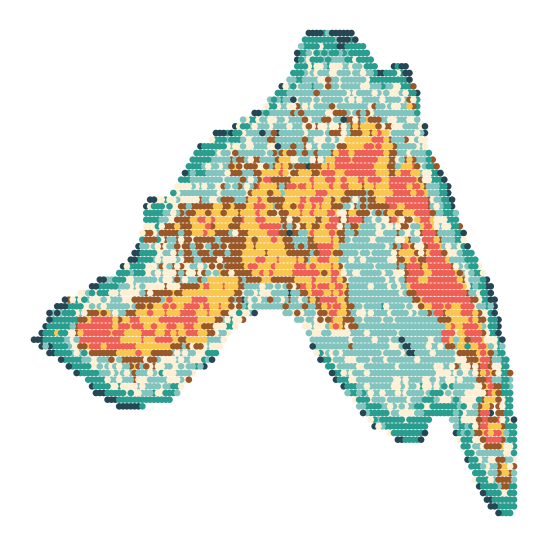

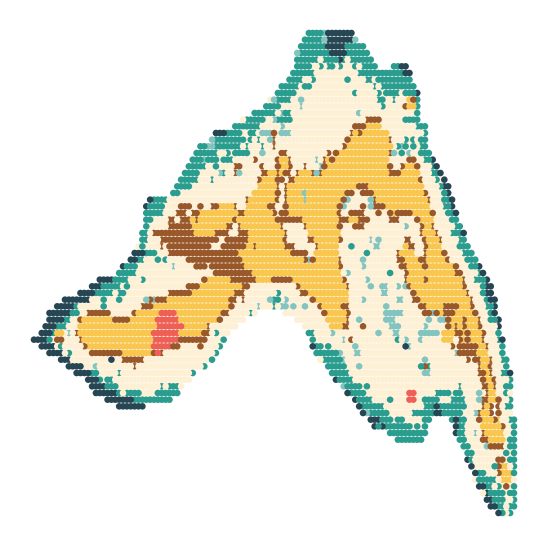

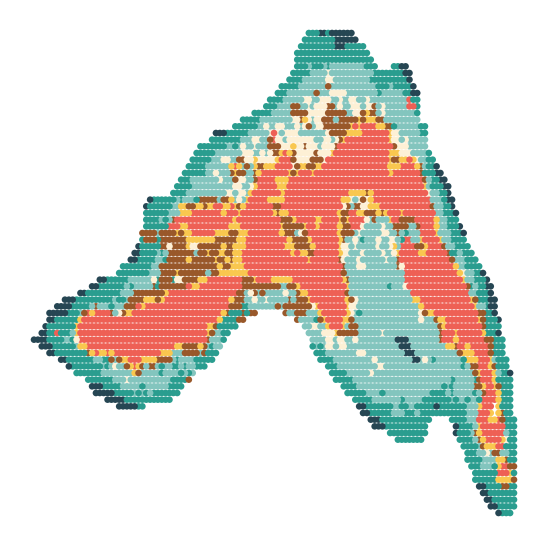

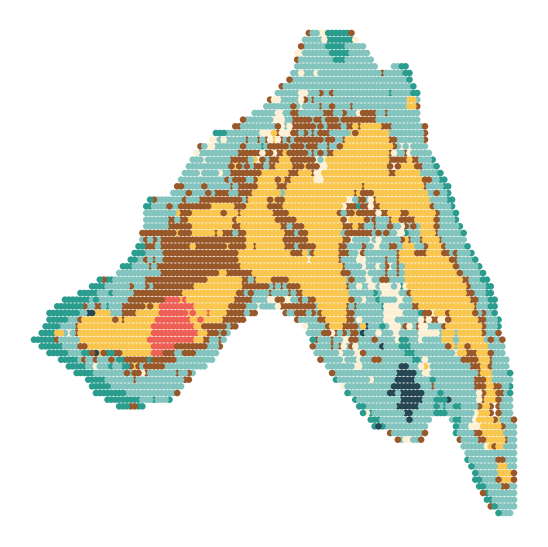

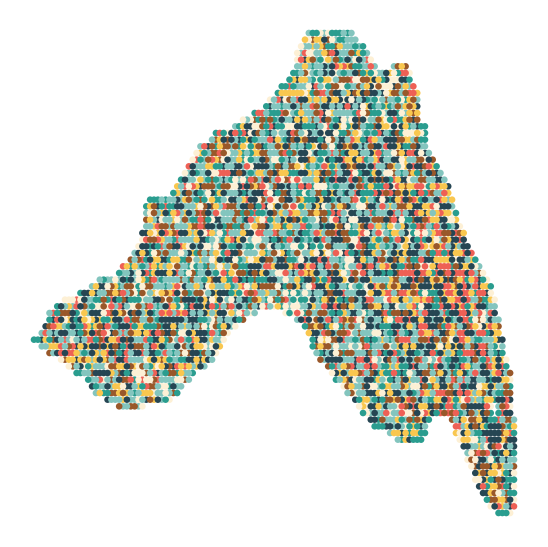

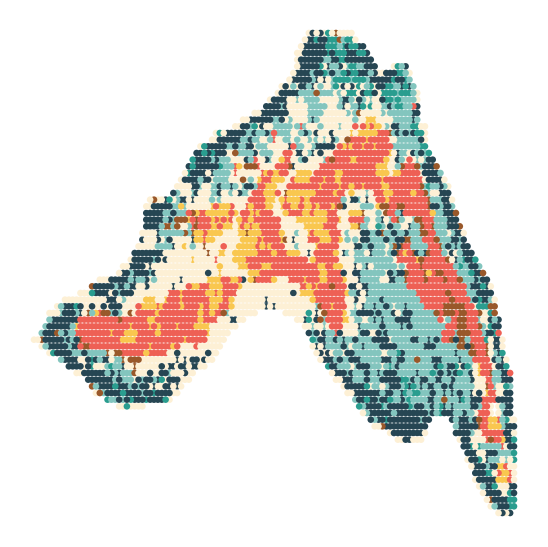

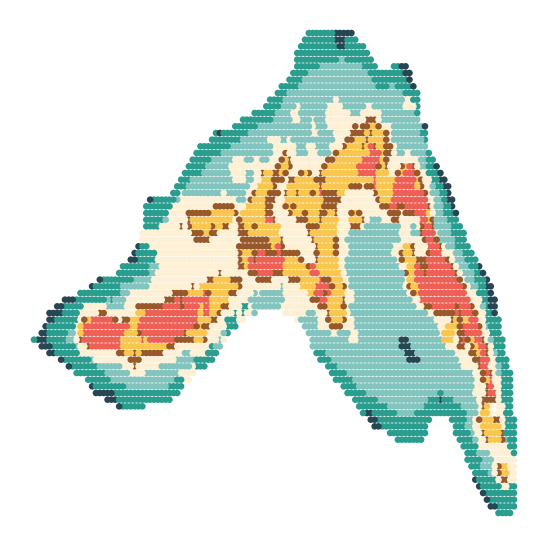

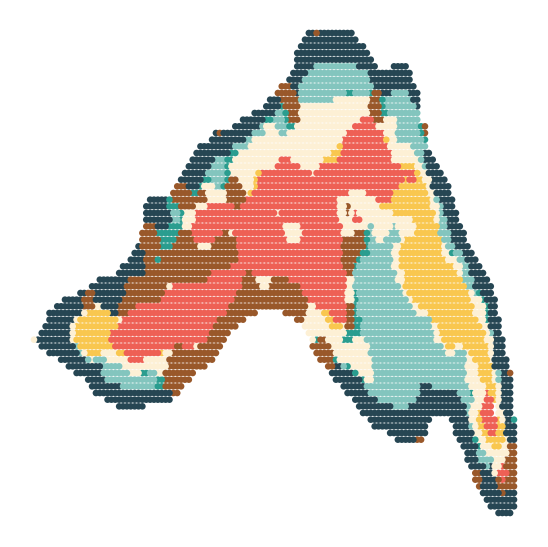

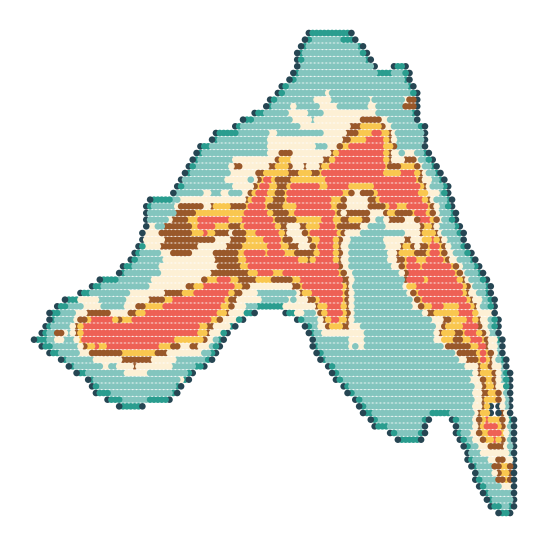

In [57]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = font_size

for result in result_key:

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    sc.pl.embedding(adata_results, basis='spatial', color=[result], ax=ax, s=90, show=False, palette=colors_domain[result])
    ax.set_title(f"")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.invert_yaxis()
    ax.get_legend().remove()

    # Hide axis borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Adjust subplot parameters
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.tight_layout()

    plt.savefig(f'{result}.png', dpi=500)
    plt.savefig(f'{result}.eps')

    plt.show()